In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
df = pd.read_csv("Titanic_train1.csv")

In [63]:
df.head(5)

,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,3,2.0,0
1,38.0,71.2833,1,1,1,0.0,1
2,26.0,7.9250,1,0,3,2.0,1
3,35.0,53.1000,1,1,1,2.0,1
4,35.0,8.0500,0,0,3,2.0,0


In [64]:
df.shape #size of Data frame 

(127, 7)

In [65]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Pclass', 'Embarked', '2urvived'], dtype='object')

# Exploratory Data Analysis

In [66]:
df.isnull().sum() #sum of na values 

Age         0
Fare        0
Sex         0
sibsp       0
Pclass      0
Embarked    1
2urvived    0
dtype: int64

In [67]:
df.dropna()

,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,3,2.0,0
1,38.0,71.2833,1,1,1,0.0,1
2,26.0,7.9250,1,0,3,2.0,1
3,35.0,53.1000,1,1,1,2.0,1
4,35.0,8.0500,0,0,3,2.0,0
...,...,...,...,...,...,...,...
122,32.5,30.0708,0,1,2,0.0,0
123,64.0,26.0000,0,0,1,2.0,0
124,28.0,13.8625,0,0,2,0.0,1
125,33.0,20.5250,0,1,3,2.0,0


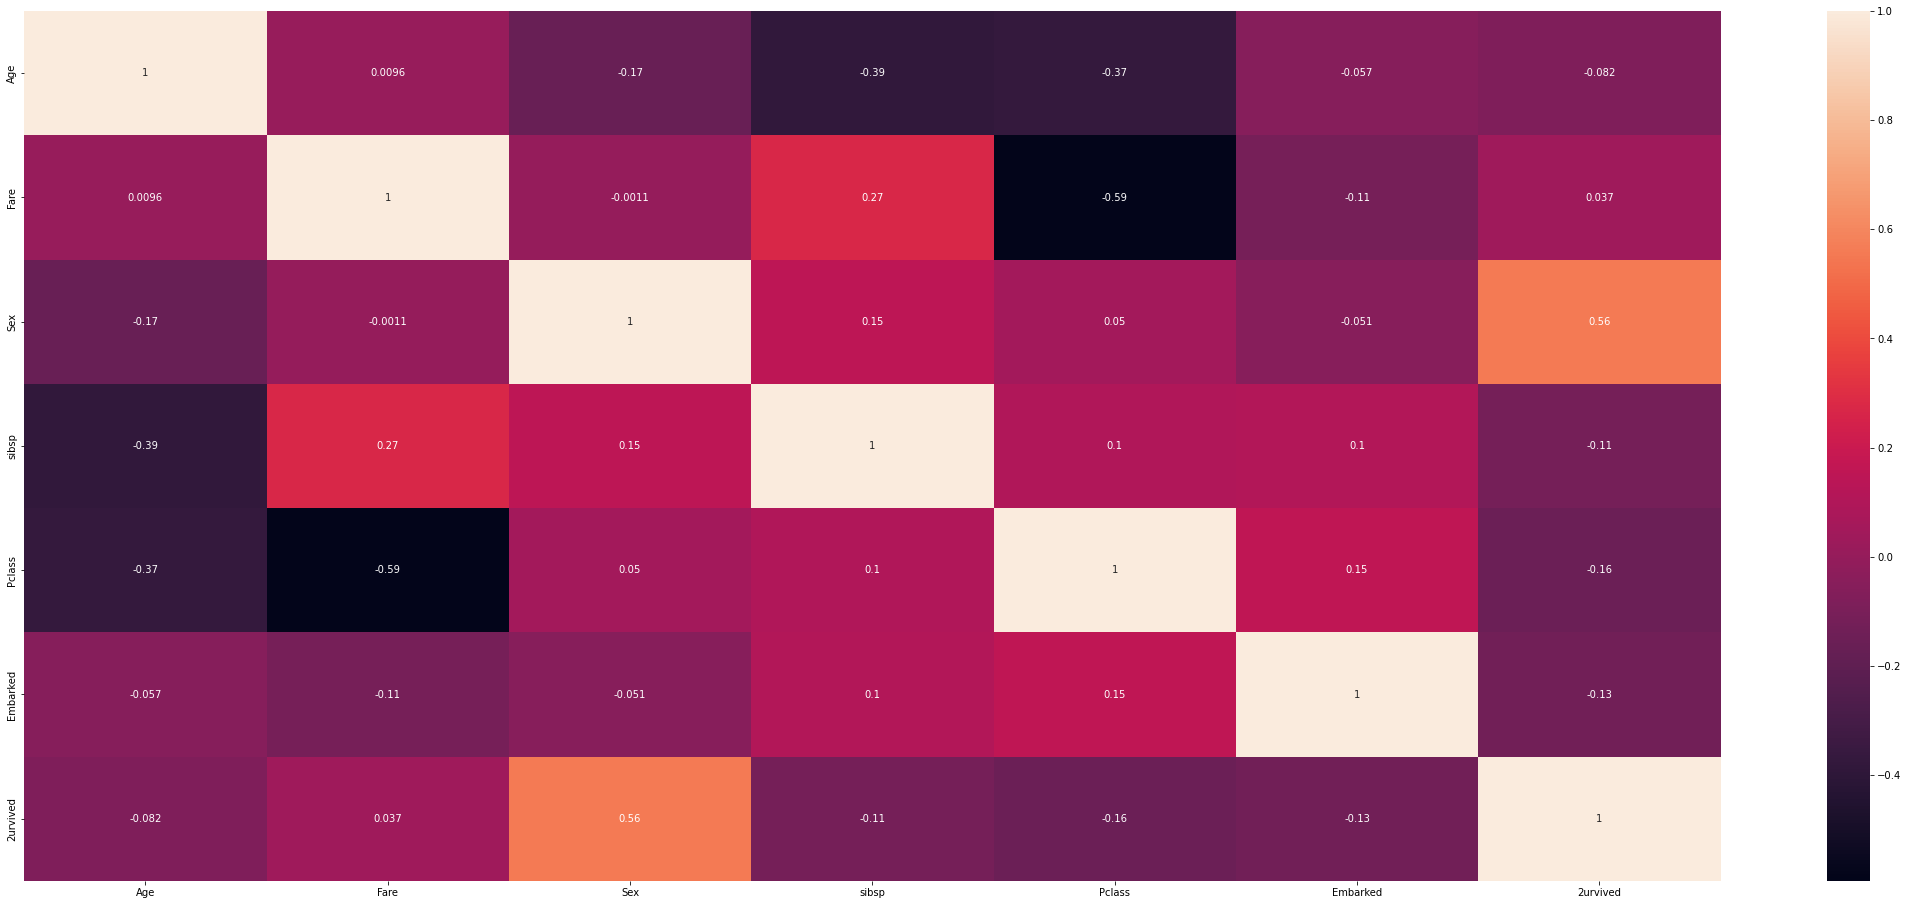

In [68]:
df.head() #we delete unnecessary data 

sum(df.duplicated())

#Exploratory Data Visualization 
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

<AxesSubplot:xlabel='2urvived', ylabel='count'>

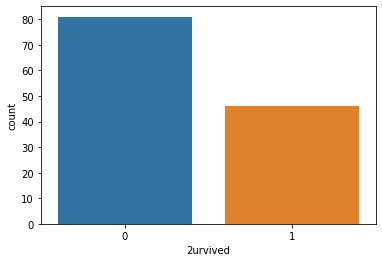

In [69]:
sns.countplot(x='2urvived',data=df)


<AxesSubplot:xlabel='2urvived', ylabel='count'>

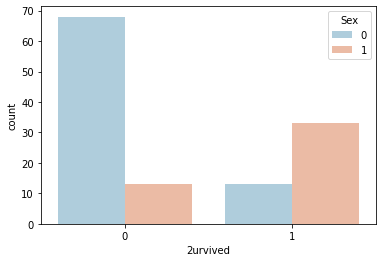

In [70]:
sns.countplot(x='2urvived',data=df,hue='Sex',palette='RdBu_r')

Clearly there's a trend here. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female. Where 0 is Male and 1 Female 

# Cleaning Data and work with NAN

In [71]:
print(np.any(np.isnan(df)))
data = np.nan_to_num(df)
print(df)

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

True
      Age     Fare  Sex  sibsp  Pclass  Embarked  2urvived
0    22.0   7.2500    0      1       3       2.0         0
1    38.0  71.2833    1      1       1       0.0         1
2    26.0   7.9250    1      0       3       2.0         1
3    35.0  53.1000    1      1       1       2.0         1
4    35.0   8.0500    0      0       3       2.0         0
..    ...      ...  ...    ...     ...       ...       ...
122  32.5  30.0708    0      1       2       0.0         0
123  64.0  26.0000    0      0       1       2.0         0
124  28.0  13.8625    0      0       2       0.0         1
125  33.0  20.5250    0      1       3       2.0         0
126   8.0  36.7500    0      1       2       2.0         1

[127 rows x 7 columns]


# Model /Train/ classifier 

In [89]:
#divided into training and test sets.
X = df.iloc[:,df.columns != 'Class']
y = df.Pclass
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=5)

df['Pclass'] = df.Pclass.fillna(0).astype(int)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#build model 
model = LogisticRegression()
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=10000, multi_class='warn', random_state=0,
                   solver='liblinear')

In [90]:
model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc))

The Accuracy for Training Set is 1.0


In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [92]:
logmodel.score(X_train,y_train)

1.0

In [93]:
logmodel.score(X_test,y_test)

0.9166666666666666